# Phase 3: Unsupervised learning

For the unsupervised learning phase we choose K-means clustering algorithm.K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.It is an iterative process of assigning each data point to the groups and slowly data points get clustered based on similar features. The objective is to minimize the sum of distances between the data points and the cluster centroid, to identify the correct group each data point should belong to.[source] 

[source] Sharma, N. (2023) K-means clustering explained, neptune.ai. Available at: https://neptune.ai/blog/k-means-clustering (Accessed: 19 May 2023). 

Importing Important Libraries

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [32]:
# iris = pd.read_csv('C:\AI-Project\Dataset\waterQualityCleaned.csv')
iris = pd.read_csv('C:/fluttergithubapp/AI-Project/AI-Project/Dataset/waterQualityCleaned.csv')

WCSS and Elbow Method wich is used to select the good number of clusters.The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.The elbow graph shows WCSS values(on the y-axis) corresponding to the different values of K(on the x-axis). When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this point the Elbow point. Beyond the Elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.[source]

[source]Tomar, A. (2022) Stop using elbow method in k-means clustering, instead, use this!, Medium. Available at: https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d (Accessed: 20 May 2023). 

In [35]:
wcss=[]
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

NameError: name 'x' is not defined

Note: you may need to restart the kernel to use updated packages.


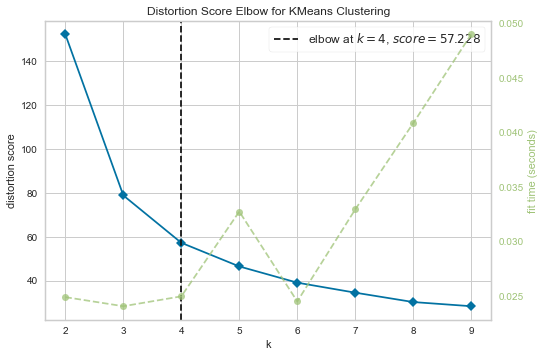

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
#Source:https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d



#install yellowbrick to vizualize the Elbow curve
%pip install yellowbrick  

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

As we can see from the image above, we will choose 2,4 and 5 as number if cluster

**1- K with size 2:**

Get all the features columns except the class

In [36]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

Here we have number of cluster = 2, then we fit the data

In [37]:
clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

Because we have 3 or more column,we cannot visualize the clustering directly. However, we apply a Principal Component Analysis to reduce the space in 2 columns and visualize this instead.

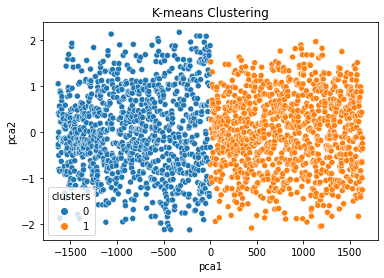

In [38]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering')
plt.show()

As we can see here, after we apply clustering with k=2 , we got these 2 groups. first group with orange color have pca1 from 0 to almost 1500, second group with purple color have pca1 less than 0 to -1500

**2- K with size 4:**

Here we have number of cluster = 4, then we fit the data

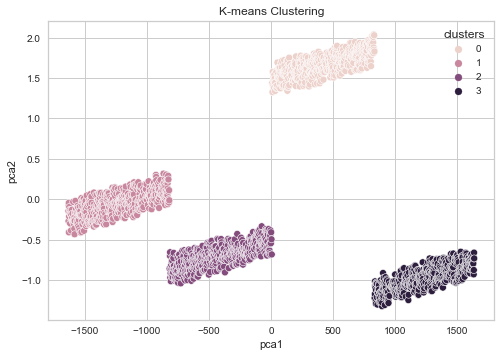

In [66]:
clustering_kmeans = KMeans(n_clusters=4)
data['clusters'] = clustering_kmeans.fit_predict(data)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering')
plt.show()

As we can see here, it is better than k=2 since we can see different clusters in different location without overlapping between them

**3- K with size 5:**

Here we have number of cluster = 5, then we fit the data

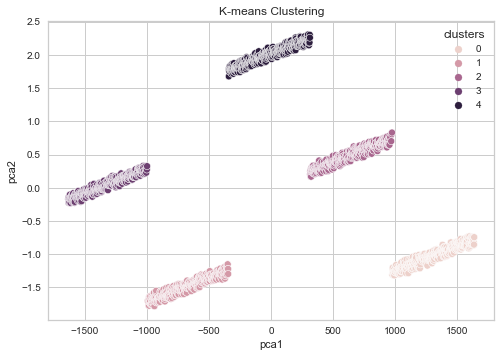

In [67]:
clustering_kmeans = KMeans(n_clusters=5)
data['clusters'] = clustering_kmeans.fit_predict(data)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering')
plt.show()

As we can see here, it is also better than k=2, and same as k=4 we can see different clusters in different location without overlapping between them

**EValuation Method**

To evalute the k-means clustring we will use different methods and metrics which are Silhouette coefficient , total within-cluster sum of square , BCubed precision and recall along with visualization of each method and metric along with our obsrvation of the results.

**1.Silhouette coefficient**

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters[source]

[source]Silhouette (clustering) (2023) Wikipedia. Available at: https://en.wikipedia.org/wiki/Silhouette_(clustering) (Accessed: 19 May 2023). 

Import the libraries from sklearn

In [65]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

The k and associated Silhouette scores are:  {2: 0.6274812851154871, 3: 0.5894059923088207, 4: 0.5706047214701452, 5: 0.5696042619026317}


Implement the silhouette algorithm.We can observe the fllowing results for each clustering value starting from 2 up untill 5 clusters :

2: 0.627481431521672,

3: 0.5893483143969658,

4: 0.5701792797942534,

5: 0.5695587418652014

as the silhouette coefficient results the values from the range of -1 to +1 we can see that the k=2 provides the best silhouette coefficient value and the closest to +1.

In [69]:

silhouette_scores = dict()
range_of_k = range(2,6)
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(reduced_data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(reduced_data, cluster_labels)
    silhouette_scores[k]=score
print("The k and associated Silhouette scores are: ",silhouette_scores)

The k and associated Silhouette scores are:  {2: 0.627481431521672, 3: 0.5893483143969658, 4: 0.5701792797942534, 5: 0.5695587418652014}


Here we Visualized the results of each clustring value and as the figure shows the k=2 provides the best silhouette coefficient results and the closest value to +1.

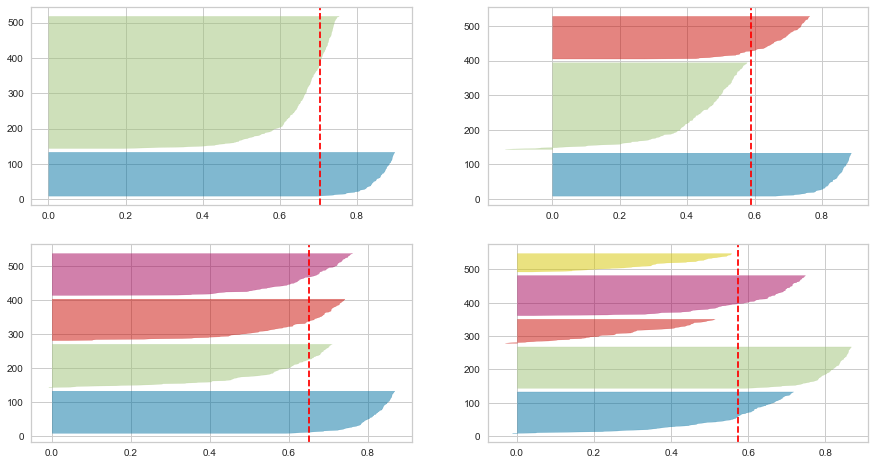

In [70]:
#Source:https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam



from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**2.Total within-cluster sum of square**

The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster.[source]

[source]Interpret all statistics and graphs for Cluster K-means (no date) Minitab. Available at: https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/#:~:text=The%20within%2Dcluster%20sum%20of%20squares%20is%20a%20measure%20of,a%20large%20sum%20of%20squares. (Accessed: 19 May 2023). 

Implement the WCSS and visualize the results.

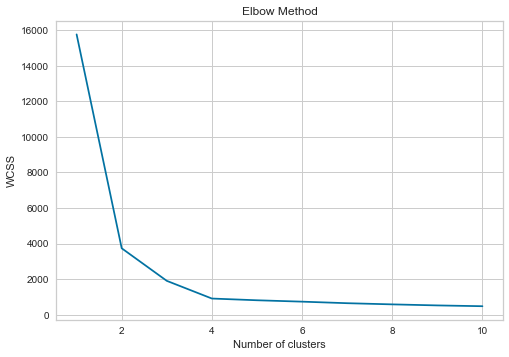

In [81]:
#Source:https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

visualize with k=2 as it shows the centroid along with the clustring values in each cluster.

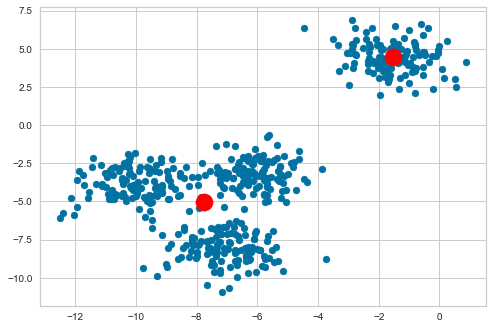

In [73]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

visualize with k=3 as it shows the centroid along with the clustring values in each cluster.

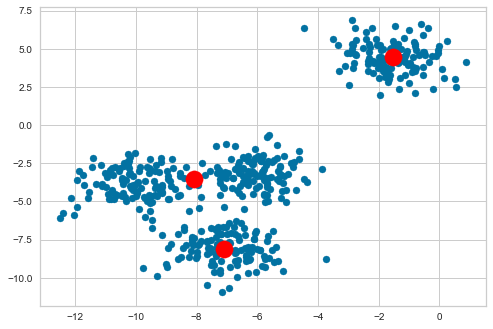

In [74]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

visualize with k=4 as it shows the centroid along with the clustring values in each cluster.

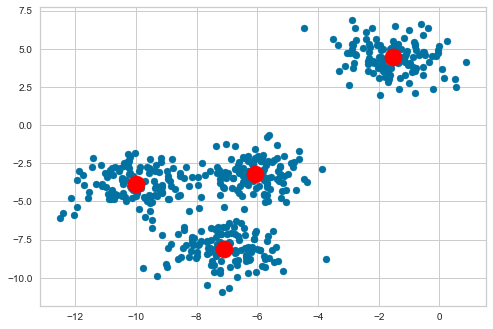

In [75]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

visualize with k=5 as it shows the centroid along with the clustring values in each cluster.

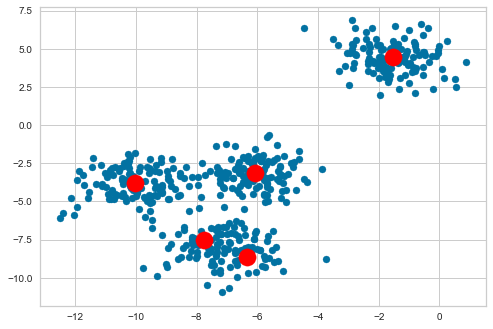

In [76]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

**3.BCubed precision and recall**

BCubed metrics decompose the evaluation process estimating the precision and recall associated to each item in the distribution. The item precision represents how many items in the same cluster belong to its category. Symmetrically, the recall associated to one item represents how many items from its category appear in its cluster[source]

[source]Interpret all statistics and graphs for Cluster K-means (no date a) Minitab. Available at: https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/#:~:text=The%20within%2Dcluster%20sum%20of%20squares%20is%20a%20measure%20of,a%20large%20sum%20of%20squares. (Accessed: 19 May 2023). 

Install libraries

In [77]:
%pip install bcubed
%pip install --user bcubed

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Implement calculations for both BCubed precision and recall.

In [89]:
#Source :https://github.com/m-wiesner/BCUBED/blob/master/B3score/b3.py

import sys
import numpy as np
import bcubed

# Calculate precision and recall for each class     
def compute_class_precision_recall(L,K):

  # Make everything nicely formatted. Ignore skipped labels or clusters  
  _,L = np.unique(np.array(L),return_inverse=True)
  _,K = np.unique(np.array(K),return_inverse=True)

  # Check that there are the same number of labels and clusters 
  if(len(L) != len(K)):
    sys.stderr.write("Labels and clusters are not of the same length.")
    sys.exit(1)

  # Extract some useful variables that will make things easier to read.
  # 1. Number of total elements to cluster
  # 2. Number of distinct labels
  # 3. Number of distinct clusters
  num_elements = len(L)
  num_labels   = L.max() + 1
  num_clusters = K.max() + 1

  # Create binary num_elements x num_labels / num_clusters assignment matrices. 
  X_L = np.tile(L, (num_labels,1) ).T
  X_K = np.tile(K, (num_clusters,1) ).T

  L_j = np.equal( np.tile(np.arange(num_labels),(num_elements,1))   , X_L ).astype(float)
  K_j = np.equal( np.tile(np.arange(num_clusters),(num_elements,1)) , X_K ).astype(float)   

  # Create the partitions matrix which has an element for the 
  # intersection of label i, and cluster j. The element of the matrix is the
  # Number of elements in that partition.
  P_ij = np.dot(L_j.T,K_j) 

  # Summing over the appropriate axes gives the total number of elements
  # in each class label (S_i) or cluster T_i
  S_i  = P_ij.sum(axis=1)
  T_i  = P_ij.sum(axis=0)

  # Calculate Class recall and precision
  R_i  = ( P_ij * P_ij ).sum(axis=1) / ( S_i * S_i )
  P_i  = ( P_ij.T * P_ij.T ).sum(axis=1) / ( T_i * T_i )

  return [(P_i , R_i) , (S_i , T_i)]

# Calculate b3 metrics  
def calc_b3(L , K , class_norm=False, beta=1.0):
  
  # Compute per equivalence class precision and recall
  precision_recall , class_sizes = compute_class_precision_recall(L,K)
  
  # Two methods of obtaining overall precision and recall
  if(class_norm == True):
    precision = precision_recall[0].sum() / class_sizes[1].size
    print("Precision",precision) 
    recall    = precision_recall[1].sum() / class_sizes[0].size
    print("Recall",recall)
  else:
    precision = ( precision_recall[0] * class_sizes[1] ).sum() / class_sizes[1].sum()
    print("Precision",precision)
    recall    = ( precision_recall[1] * class_sizes[0] ).sum() / class_sizes[0].sum()
    print("Recall",recall)
  
  # f_measure with option beta to weight the precision and recall asymmetrically.
  f_measure = (1 + beta**2) * (precision * recall) /( (beta**2) * precision + recall ) 

  return [f_measure,precision,recall]      


num_cases = 4

num_clusters = np.random.randint(1,10,(num_cases,))
num_labels = np.random.randint(1,10,(num_cases,))
num_elements = np.random.randint(1000,2000,(num_cases,))

for i in np.arange(num_cases):
  L = np.random.randint(1,num_clusters[i]+1,(num_elements[i],))
  K = np.random.randint(1,num_labels[i]+1,(num_elements[i],))
  
  [my_f,my_p,my_r] = calc_b3(L,K)
  
  Ldict = { i:set([L[i]])  for i in np.arange(num_elements[i])}
  Cdict = { i:set([K[i]])  for i in np.arange(num_elements[i])}
  
  p = bcubed.precision(Cdict,Ldict)
  r = bcubed.recall(Cdict,Ldict)
  f = bcubed.fscore(p,r)

  # Check 
  if(abs(p - my_p) > 0.0001 or abs(r - my_r) > 0.001 or abs(f - my_f) > 0.0001):
    print("ERROR") 






Precision 0.14471700237303642
Recall 0.33679405233768644
Precision 0.20269252301124557
Recall 0.14535049036979603
Precision 0.33703174312753964
Recall 0.14428873334705727
Precision 0.11468585372379085
Recall 0.20623490686778648
